In [1]:
import skimage
import os
from skimage import io
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
import re
import numpy as np
import seaborn as sn
## for the stats class
import scipy.signal as sg
from skimage.transform import rescale, resize, downscale_local_mean
from sklearn.decomposition import SparsePCA
import pywt
from scipy import stats
#import optshrink as opt # package we create
import numpy as np
# import scipy.io as sio
import h5py
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr

In [8]:
colnames_hurtt_nums = ['lon', 'lat', 'year', 'col1', 'col2', 'col3', 'col4', 'col5', 'col6', 'col7', 'col8', 'col9', 'col10', 'col11', 'col12', 'col13', 'col14', 'col15', 'col16', 'col17', 'col18', 'col19', 'col20', 'col21', 'col22']
colnames_hurtt = ['nlon','nlat','yr','totalarea','lf_regrid','vu_regrid','vc_regrid','vp_regrid','su_regrid','sc_regrid','sp_regrid','us_regrid','uc_regrid','up_regrid','cs_regrid','cu_regrid','cp_regrid','ps_regrid','pu_regrid','pc_regrid','vs1_regrid','vs2_regrid','ss1_regrid','ss2_regrid','vs_regrid']

colnames_cohorts = ['lon', 'lat','col1', 'col2', 'col3', 'col4', 'col5', 'col6', 'col7', 'col8', 'col9', 'col10', 'col11', 'col12', 'col13', 'col14', 'col15', 'col16', 'col17', 'col18', 'col19', 'col20', 'col21', 'col22','col23','col24']


In [ ]:
# processed_cohorts = pd.read_csv(
#     '/home/smmrrr/TEM_Climate_Data/LULCC/cpp_files/output_LULCCRT.txt'
#     , names = colnames_cohorts)




In [ ]:
###how many years?

In [11]:
potcohorts = pd.read_csv('/home/smmrrr/TEM_Climate_Data/LULCC/support_files/cruHurtt3.2.1potlulccohrtsr_hurttlf.glb', names = colnames_cohorts)
maxcohorts = pd.read_csv('/home/smmrrr/TEM_Climate_Data/LULCC/support_files/cruHurtt3.2.1potmxcohrtsr_hurttlf.glb')

In [12]:
maxcohorts.loc[0]

-180.0000         -180.0
65.0000             65.5
 MXCOHRTS      MXCOHRTS 
1040                1030
-111                -111
1                      1
1.1                    1
 Asia               Asia
Name: 0, dtype: object

In [13]:
maxcohorts.loc[maxcohorts['-180.0000'] == -156.5]

,-180.0000,65.0000,MXCOHRTS,1040,-111,1,1.1,Asia
622,-156.5,19.5,MXCOHRTS,332,-111,2,2,North_America
623,-156.5,20.5,MXCOHRTS,2299,-111,2,2,North_America
624,-156.5,57.0,MXCOHRTS,927,-111,1,1,North_America
625,-156.5,57.5,MXCOHRTS,1649,-111,1,1,North_America
626,-156.5,58.0,MXCOHRTS,1626,-111,1,1,North_America
627,-156.5,58.5,MXCOHRTS,1603,-111,1,1,North_America
628,-156.5,59.0,MXCOHRTS,1580,-111,1,1,North_America
629,-156.5,59.5,MXCOHRTS,1557,-111,1,1,North_America
630,-156.5,60.0,MXCOHRTS,1533,-111,1,1,North_America
631,-156.5,60.5,MXCOHRTS,1510,-111,1,1,North_America


In [17]:
g_hurtt_hist_input = pd.read_table('/home/smmrrr/TEM_Climate_Data/LULCC/output_files/historical/transitionslf_total_exp.txt'
                                   , delim_whitespace=True, names = colnames_hurtt)


In [8]:
potcohorts = potcohorts.set_index(['lon', 'lat'])
g_hurtt_hist_input = g_hurtt_hist_input.set_index(['lon', 'lat'])
potcohorts.index

NameError: name 'g_hurtt_fut_input' is not defined

In [24]:
potcohorts

col1  col2  col3  col4  col5  col6  col7  col8  col9  \
lon    lat                                                                
-180.0 65.0   LULCCHRT   -111     1     1  3000  1040     3     3     3   
       65.5   LULCCHRT   -111     1     1  3000  1030     3     3     3   
       66.0   LULCCHRT   -111     1     1  3000  1245     2     2     2   
       66.5   LULCCHRT   -111     1     1  3000  1220     2     2     2   
       67.0   LULCCHRT   -111     1     1  3000  1195     2     2     2   
...                 ...   ...   ...   ...   ...   ...   ...   ...   ...   
 179.5 67.5   LULCCHRT   -111     1     1  3000  1170     2     2     2   
       68.0   LULCCHRT   -111     1     1  3000  1145     2     2     2   
       68.5   LULCCHRT   -111     1     1  3000  1120     2     2     2   
       70.5   LULCCHRT   -111     1     1  3000   225     3     3     3   
       71.0   LULCCHRT   -111     1     1  3000   993     2     2     2   

             col10  ...  col15  col16  col17  col18  col19  col20  col21  \
lon    lat          ...                                                    
-180.0 65.0      0  ...      0      0   2000    0.0    0.0    0.0    0.0   
       65.5      0  ...      0      0   2000    0.0    0.0    0.0    0.0   
       66.0      0  ...      0      0   2000    0.0    0.0    0.0    0.0   
       66.5      0  ...      0      0   2000    0.0    0.0    0.0    0.0   
       67.0      0  ...      0      0   2000    0.0    0.0    0.0    0.0   
...            ...  ...    ...    ...    ...    ...    ...    ...    ...   
 179.5 67.5      0  ...      0      0   2000    0.0    0.0    0.0    0.0   
       68.0      0  ...      0      0   2000    0.0    0.0    0.0    0.0   
       68.5      0  ...      0      0   2000    0.0    0.0    0.0    0.0   
       70.5      0  ...      0      0   2000    0.0    0.0    0.0    0.0   
       71.0      0  ...      0      0   2000    0.0    0.0    0.0    0.0   

             col22  col23    col24  
lon    lat                          
-180.0 65.0    0.0    0.0   Russia  
       65.5    0.0    0.0   Russia  
       66.0    0.0    0.0   Russia  
       66.5    0.0    0.0   Russia  
       67.0    0.0    0.0   Russia  
...            ...    ...      ...  
 179.5 67.5    0.0    0.0   Russia  
       68.0    0.0    0.0   Russia  
       68.5    0.0    0.0   Russia  
       70.5    0.0    0.0   Russia  
       71.0    0.0    0.0   Russia  

[77619 rows x 24 columns]

In [30]:
# g_hurtt_hist_input.loc[g_hurtt_hist_input['year'] == 1764]
g_hurtt_hist_input.loc[(g_hurtt_hist_input['lat'] == 65.0) & (g_hurtt_hist_input['lon'] == -180)
                       , 'year'].unique().tofile('/home/smmrrr/data2.csv', sep = ',') 


In [3]:
# potcohorts.reindex(index = g_hurtt_fut_input.index)

In [26]:
print(potcohorts['65.0000'].nunique())
print(g_hurtt_hist_input['-16.5000'].nunique())

280
280


In [4]:

hist = pd.read_table(
"/home/smmrrr/TEM_Climate_Data/LULCC/output_files/historical/transitionslf_total_exp.txt"
    , delim_whitespace=True, names = colnames_hurtt)


In [10]:
colnames_hurtt

['nlon',
 'nlat',
 'yr',
 'totalarea',
 'lf_regrid',
 'vu_regrid',
 'vc_regrid',
 'vp_regrid',
 'su_regrid',
 'sc_regrid',
 'sp_regrid',
 'us_regrid',
 'uc_regrid',
 'up_regrid',
 'cs_regrid',
 'cu_regrid',
 'cp_regrid',
 'ps_regrid',
 'pu_regrid',
 'pc_regrid',
 'vs1_regrid',
 'vs2_regrid',
 'ss1_regrid',
 'ss2_regrid',
 'vs_regrid']

In [12]:
print(np.array(hist.loc[( hist['year'] == 1750 )&
        ( hist['lon'] == -156.5 ) & 
        ( hist['lat'] == 20.5 )
        ]))

print(np.array(hist.loc[( hist['year'] == 1500 )&
        ( hist['lon'] == -156.5 ) & 
        ( hist['lat'] == 20.5 )
        ]))

[[-1.5650e+02  2.0500e+01  1.7500e+03  9.0573e-05  1.0000e+00  0.0000e+00
   0.0000e+00  6.8350e-05  4.2404e-06  0.0000e+00  1.3452e-07  0.0000e+00
   0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00
   1.7848e-05  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00
   0.0000e+00]]
[[-1.5650e+02  2.0500e+01  1.5000e+03  4.2582e-06  1.0000e+00  1.1747e-07
   0.0000e+00  0.0000e+00  1.6240e-06  0.0000e+00  0.0000e+00  0.0000e+00
   0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00
   0.0000e+00  0.0000e+00  2.5153e-06  0.0000e+00  1.4520e-09  0.0000e+00
   0.0000e+00]]


In [ ]:

hist = pd.read_table(
"/home/smmrrr/TEM_Climate_Data/LULCC/output_files/historical/transitionslf_total_exp.txt"
    , delim_whitespace=True, names = colnames_hurtt)



In [10]:
hist.loc[( hist['year'] == 1501 )&
        ( hist['lon'] == -156.5 )# & 
        #( hist['year'] == 1501 )
        ]

,lon,lat,year,col1,col2,col3,col4,col5,col6,col7,...,col13,col14,col15,col16,col17,col18,col19,col20,col21,col22
726446,-156.5,19.5,1501,0.000000,0.5,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000e+00,0.0,0.0
727611,-156.5,20.5,1501,0.000004,1.0,0.0,0.0,0.0,0.000002,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000002,0.0,1.439000e-09,0.0,0.0
728776,-156.5,57.0,1501,0.000000,0.5,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000e+00,0.0,0.0
729941,-156.5,57.5,1501,0.000000,1.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000e+00,0.0,0.0
731106,-156.5,58.0,1501,0.000000,1.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000e+00,0.0,0.0
732271,-156.5,58.5,1501,0.000000,1.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000e+00,0.0,0.0
733436,-156.5,59.0,1501,0.000000,1.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000e+00,0.0,0.0
734601,-156.5,59.5,1501,0.000000,1.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000e+00,0.0,0.0
735766,-156.5,60.0,1501,0.000000,1.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000e+00,0.0,0.0
736931,-156.5,60.5,1501,0.000000,1.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000e+00,0.0,0.0


In [4]:
g_hurtt_fut_input = pd.read_table('/home/smmrrr/TEM_Climate_Data/LULCC/output_files/ssp126/transitionslf_total_exp.txt', delim_whitespace=True, names = colnames_hurtt)



In [5]:
print(
  hist['year'].max()
    ,hist['year'].min()
        ,  g_hurtt_fut_input['year'].max()
    ,g_hurtt_fut_input['year'].min()

)

2014 850 2099 2015


In [15]:
g_hurtt_fut_input.loc[0]

lon      -180.00
lat       -16.50
year     2015.00
col1        0.00
col2        0.25
col3        0.00
col4        0.00
col5        0.00
col6        0.00
col7        0.00
col8        0.00
col9        0.00
col10       0.00
col11       0.00
col12       0.00
col13       0.00
col14       0.00
col15       0.00
col16       0.00
col17       0.00
col18       0.00
col19       0.00
col20       0.00
col21       0.00
col22       0.00
Name: 0, dtype: float64

In [29]:
g_hurtt_fut_input.describe()

,lon,lat,year,col1,col2,col3,col4,col5,col6,col7,...,col13,col14,col15,col16,col17,col18,col19,col20,col21,col22
count,3.073551e+06,3.073551e+06,3.073551e+06,3.073551e+06,3.073551e+06,3.073551e+06,3.073551e+06,3.073551e+06,3.073551e+06,3.073551e+06,...,3.073551e+06,3.073551e+06,3.073551e+06,3.073551e+06,3.073551e+06,3.073551e+06,3.073551e+06,3.073551e+06,3.073551e+06,3073551.0
mean,-4.161192e+01,2.722879e+01,2.057000e+03,1.795753e-02,9.621537e-01,1.475661e-07,9.650776e-05,1.713918e-05,2.502432e-05,1.692818e-03,...,1.437963e-05,1.683090e-05,3.870093e-04,1.374567e-05,1.490016e-04,3.722339e-04,2.561934e-04,8.020265e-03,5.152225e-03,0.0
std,5.896480e+01,3.223832e+01,2.453572e+01,7.398626e-02,1.382465e-01,8.711942e-06,8.349909e-04,2.139181e-04,1.152844e-04,5.804256e-03,...,6.356863e-05,1.530344e-04,2.142511e-03,5.557790e-05,9.314019e-04,1.845129e-03,1.443126e-03,6.937807e-02,2.368207e-02,0.0
min,-1.800000e+02,-5.600000e+01,2.015000e+03,0.000000e+00,2.500000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
25%,-9.100000e+01,1.000000e+00,2.036000e+03,1.067050e-05,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
50%,-5.450000e+01,3.150000e+01,2.057000e+03,1.855700e-03,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.569100e-08,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
75%,1.750000e+01,5.500000e+01,2.078000e+03,9.573300e-03,1.000000e+00,0.000000e+00,5.226900e-10,0.000000e+00,7.519250e-06,1.517900e-04,...,2.137400e-06,0.000000e+00,1.481000e-05,4.108800e-06,6.534300e-08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
max,4.350000e+01,8.350000e+01,2.099000e+03,9.999000e-01,1.000000e+00,1.370300e-03,1.410100e-01,2.294100e-02,7.783400e-03,2.053000e-01,...,8.331000e-03,1.299300e-02,1.487000e-01,3.908100e-03,8.422200e-02,5.908700e-01,7.713100e-02,9.999000e-01,9.627400e-01,0.0


In [9]:
hurtt_hist_input = pd.read_table('/home/smmrrr/TEM_Climate_Data/LULCC/output_files/historical/transitionslf_total_exp_usa48.txt', delim_whitespace=True)

In [13]:
hurtt_hist_input

,-125.0000,42.5000,850,0.0000e+00,2.5000e-01,0.0000e+00.1,0.0000e+00.2,0.0000e+00.3,0.0000e+00.4,0.0000e+00.5,...,0.0000e+00.11,0.0000e+00.12,0.0000e+00.13,0.0000e+00.14,0.0000e+00.15,0.0000e+00.16,0.0000e+00.17,0.0000e+00.18,0.0000e+00.19,0.0000e+00.20
0,-125.0,42.5,851,0.000000,0.25,0.0,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000e+00,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0
1,-125.0,42.5,852,0.000000,0.25,0.0,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000e+00,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0
2,-125.0,42.5,853,0.000000,0.25,0.0,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000e+00,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0
3,-125.0,42.5,854,0.000000,0.25,0.0,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000e+00,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0
4,-125.0,42.5,855,0.000000,0.25,0.0,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000e+00,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3938859,-67.5,44.5,2010,0.002045,1.00,0.0,0.000000,1.591700e-06,0.000015,0.000000,...,3.956000e-07,0.000054,0.0,0.000002,0.0,0.001228,0.0,0.000684,0.0,0.0
3938860,-67.5,44.5,2011,0.002834,1.00,0.0,0.000002,2.445400e-06,0.000015,0.000094,...,3.899600e-07,0.000000,0.0,0.000002,0.0,0.001460,0.0,0.001162,0.0,0.0
3938861,-67.5,44.5,2012,0.002180,1.00,0.0,0.000000,6.231700e-07,0.000054,0.000000,...,7.403400e-07,0.000054,0.0,0.000006,0.0,0.001078,0.0,0.000773,0.0,0.0
3938862,-67.5,44.5,2013,0.003124,1.00,0.0,0.000003,1.673300e-06,0.000016,0.000155,...,4.197100e-07,0.000000,0.0,0.000002,0.0,0.001359,0.0,0.001502,0.0,0.0


In [15]:
usa = pd.read_table('/home/smmrrr/TEM_Climate_Data/LULCC/support_files/lonlathurttlf_usa48.txt', delim_whitespace = True)

In [16]:
usa

,-125,42.5
0,-125.0,47.5
1,-125.0,48.0
2,-124.5,40.0
3,-124.5,40.5
4,-124.5,41.0
...,...,...
3375,-68.0,44.0
3376,-68.0,44.5
3377,-68.0,45.0
3378,-68.0,45.5


In [14]:
hurtt_hist_input["42.5000"].nunique()

48

In [4]:
xr.open_dataset('/home/smmrrr/TEM_Climate_Data/LULCC/hurtt_files/states.nc',decode_times=False)

<xarray.Dataset>
Dimensions:     (time: 1166, lat: 720, lon: 1440, bounds: 2)
Coordinates:
  * time        (time) float64 0.0 1.0 2.0 3.0 ... 1.163e+03 1.164e+03 1.165e+03
  * lat         (lat) float64 89.88 89.62 89.38 89.12 ... -89.38 -89.62 -89.88
  * lon         (lon) float64 -179.9 -179.6 -179.4 -179.1 ... 179.4 179.6 179.9
Dimensions without coordinates: bounds
Data variables: (12/16)
    primf       (time, lat, lon) float32 ...
    primn       (time, lat, lon) float32 ...
    secdf       (time, lat, lon) float32 ...
    secdn       (time, lat, lon) float32 ...
    urban       (time, lat, lon) float32 ...
    c3ann       (time, lat, lon) float32 ...
    ...          ...
    pastr       (time, lat, lon) float32 ...
    range       (time, lat, lon) float32 ...
    secmb       (time, lat, lon) float32 ...
    secma       (time, lat, lon) float32 ...
    lat_bounds  (lat, bounds) float64 ...
    lon_bounds  (lon, bounds) float64 ...
Attributes: (12/17)
    host:              UMD College Park
    comment:           LUH2
    contact:           gchurtt@umd.edu, lchini@umd.edu, steve.frolking@unh.ed...
    creation_date:     2016-10-12T18:26:36Z
    title:             Land-Use Harmonization Data Sets
    activity_id:       input4MIPs
    ...                ...
    further_info_url:  http://luh.umd.edu
    frequency:         yr
    institution_id:    UofMD
    institution:       University of Maryland College Park
    realm:             land
    references:        Hurtt, Chini et al. 2011

In [6]:
hist = xr.open_dataset('/home/smmrrr/TEM_Climate_Data/LULCC/hurtt_files/CMIP6/historical/transitions.nc',decode_times=False)




In [7]:
hist

<xarray.Dataset>
Dimensions:         (time: 1165, lat: 720, lon: 1440, bounds: 2)
Coordinates:
  * time            (time) float64 0.0 1.0 2.0 ... 1.162e+03 1.163e+03 1.164e+03
  * lat             (lat) float64 89.88 89.62 89.38 ... -89.38 -89.62 -89.88
  * lon             (lon) float64 -179.9 -179.6 -179.4 ... 179.4 179.6 179.9
Dimensions without coordinates: bounds
Data variables: (12/120)
    primf_to_secdn  (time, lat, lon) float32 ...
    primf_to_urban  (time, lat, lon) float32 ...
    primf_to_c3ann  (time, lat, lon) float32 ...
    primf_to_c4ann  (time, lat, lon) float32 ...
    primf_to_c3per  (time, lat, lon) float32 ...
    primf_to_c4per  (time, lat, lon) float32 ...
    ...              ...
    primn_bioh      (time, lat, lon) float32 ...
    secmf_bioh      (time, lat, lon) float32 ...
    secyf_bioh      (time, lat, lon) float32 ...
    secnf_bioh      (time, lat, lon) float32 ...
    lat_bounds      (lat, bounds) float64 ...
    lon_bounds      (lon, bounds) float64 ...
Attributes: (12/17)
    host:              UMD College Park
    comment:           LUH2
    contact:           gchurtt@umd.edu, lchini@umd.edu, steve.frolking@unh.ed...
    creation_date:     2016-10-12T18:26:36Z
    title:             Land-Use Harmonization Data Sets
    activity_id:       input4MIPs
    ...                ...
    further_info_url:  http://luh.umd.edu
    frequency:         yr
    institution_id:    UofMD
    institution:       University of Maryland College Park
    realm:             land
    references:        Hurtt, Chini et al. 2011

In [9]:
air2d = hist.isel(time=500)

air2d

<xarray.Dataset>
Dimensions:         (lat: 720, lon: 1440, bounds: 2)
Coordinates:
    time            float64 500.0
  * lat             (lat) float64 89.88 89.62 89.38 ... -89.38 -89.62 -89.88
  * lon             (lon) float64 -179.9 -179.6 -179.4 ... 179.4 179.6 179.9
Dimensions without coordinates: bounds
Data variables: (12/120)
    primf_to_secdn  (lat, lon) float32 ...
    primf_to_urban  (lat, lon) float32 ...
    primf_to_c3ann  (lat, lon) float32 ...
    primf_to_c4ann  (lat, lon) float32 ...
    primf_to_c3per  (lat, lon) float32 ...
    primf_to_c4per  (lat, lon) float32 ...
    ...              ...
    primn_bioh      (lat, lon) float32 ...
    secmf_bioh      (lat, lon) float32 ...
    secyf_bioh      (lat, lon) float32 ...
    secnf_bioh      (lat, lon) float32 ...
    lat_bounds      (lat, bounds) float64 90.0 89.75 89.75 ... -89.75 -90.0
    lon_bounds      (lon, bounds) float64 -180.0 -179.8 -179.8 ... 179.8 180.0
Attributes: (12/17)
    host:              UMD College Park
    comment:           LUH2
    contact:           gchurtt@umd.edu, lchini@umd.edu, steve.frolking@unh.ed...
    creation_date:     2016-10-12T18:26:36Z
    title:             Land-Use Harmonization Data Sets
    activity_id:       input4MIPs
    ...                ...
    further_info_url:  http://luh.umd.edu
    frequency:         yr
    institution_id:    UofMD
    institution:       University of Maryland College Park
    realm:             land
    references:        Hurtt, Chini et al. 2011

In [24]:
# air.isel(time=10, lon=[10, 11]).plot(y="lat", hue="lon")
hist_count = hist['secmf_harv'].sum(dim = 'time')

# hist.isel(time=500)['primf_harv'].plot()


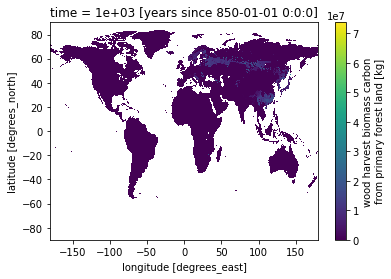

In [28]:
hist.isel(time=1000)['primf_bioh'].plot()

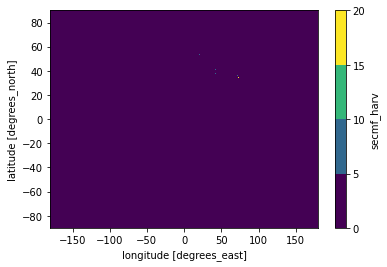

In [26]:
hist_count.plot(levels = 5)

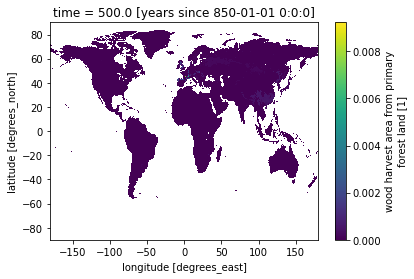

In [13]:
hist.isel(time=500)['primf_harv'].plot()


In [15]:
xr.open_dataset("/home/smmrrr/TEM_Climate_Data/LULCC/hurtt_files/states.nc",decode_times=False)

<xarray.Dataset>
Dimensions:     (time: 1166, lat: 720, lon: 1440, bounds: 2)
Coordinates:
  * time        (time) float64 0.0 1.0 2.0 3.0 ... 1.163e+03 1.164e+03 1.165e+03
  * lat         (lat) float64 89.88 89.62 89.38 89.12 ... -89.38 -89.62 -89.88
  * lon         (lon) float64 -179.9 -179.6 -179.4 -179.1 ... 179.4 179.6 179.9
Dimensions without coordinates: bounds
Data variables: (12/16)
    primf       (time, lat, lon) float32 ...
    primn       (time, lat, lon) float32 ...
    secdf       (time, lat, lon) float32 ...
    secdn       (time, lat, lon) float32 ...
    urban       (time, lat, lon) float32 ...
    c3ann       (time, lat, lon) float32 ...
    ...          ...
    pastr       (time, lat, lon) float32 ...
    range       (time, lat, lon) float32 ...
    secmb       (time, lat, lon) float32 ...
    secma       (time, lat, lon) float32 ...
    lat_bounds  (lat, bounds) float64 ...
    lon_bounds  (lon, bounds) float64 ...
Attributes: (12/17)
    host:              UMD College Park
    comment:           LUH2
    contact:           gchurtt@umd.edu, lchini@umd.edu, steve.frolking@unh.ed...
    creation_date:     2016-10-12T18:26:36Z
    title:             Land-Use Harmonization Data Sets
    activity_id:       input4MIPs
    ...                ...
    further_info_url:  http://luh.umd.edu
    frequency:         yr
    institution_id:    UofMD
    institution:       University of Maryland College Park
    realm:             land
    references:        Hurtt, Chini et al. 2011

In [5]:
720*360

259200

In [7]:
temarea = pd.read_csv(
    '~/TEM_Climate_Data/LULCC/support_files/igsmtbaselv0.5x0.5degree.glb' 
           ,names = [ 'lon', 'lat', 'Variable', 'Area', 'Elev','Area_Name']
                )

In [8]:
temarea = temarea[[ 'lon', 'lat', 'Area']]

In [13]:
temarea.to_csv('~/TEM_Climate_Data/LULCC/support_files/temarealf.txt', header = False, index = False)